# Proyek Analisis Data: Bike Sharing
- **Nama:** Valencia Sutio
- **Email:** mc172d5x1395@student.devacademy.id
- **ID Dicoding:** MC172D5X1395

## Menentukan Pertanyaan Bisnis

- Kapan saja penyewaan sepeda sangat ramai atau sepi di luar perkiraan? Apa penyebabnya?
- Seberapa besar pengaruh cuaca (suhu, kelembaban, angin, kondisi cuaca) terhadap jumlah penyewaan sepeda? Apakah pengaruhnya sama untuk semua jenis pengguna?

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [54]:
day_df = pd.read_csv(r"C:\submission 1\data\day.csv")

In [55]:
hour_df = pd.read_csv(r"C:\submission 1\data\hour.csv")

**Insight:**
- **Pustaka yang digunakan:**  Kode ini menggunakan pustaka Pandas (pd) dalam bahasa pemrograman Python. Pandas adalah pustaka yang sangat populer untuk analisis dan manipulasi data, terutama untuk data tabular seperti yang terdapat dalam file CSV.

- **Fungsi pd.read_csv():** Fungsi ini digunakan untuk membaca file dengan format CSV dan mengubahnya menjadi struktur data DataFrame dalam Pandas. DataFrame adalah struktur data tabular yang mirip dengan tabel dalam spreadsheet atau database.

- **File CSV yang dibaca:** Kode membaca dua file CSV:
    - day.csv: File ini berisi data yang dikumpulkan atau diagregasi berdasarkan hari.
    - hour.csv: File ini berisi data yang dikumpulkan atau diagregasi berdasarkan jam.

- **Variabel DataFrame:** Hasil pembacaan file CSV disimpan dalam dua variabel DataFrame:
    - day_df: Variabel ini menyimpan DataFrame yang berasal dari file day.csv.
    - hour_df: Variabel ini menyimpan DataFrame yang berasal dari file hour.csv.

- **Tujuan Kode:** Kode ini bertujuan untuk memuat data dari file CSV ke dalam DataFrame Pandas agar data tersebut dapat diolah dan dianalisis lebih lanjut. Ini adalah langkah awal yang umum dalam alur kerja analisis data.

### Assessing Data

In [56]:
#Menilai Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

**1. Kelengkapan Data:**

**Tidak Ada Nilai Null:** Output menunjukkan bahwa semua kolom (Non-Null Count) memiliki 731 entri yang sama dengan jumlah total baris (RangeIndex: 731 entries). Ini berarti tidak ada nilai yang hilang atau null dalam dataset day_df. Data ini tergolong lengkap dan siap untuk dianalisis lebih lanjut tanpa perlu penanganan missing values.

**2. Tipe Data Kolom:**

**Dominasi Tipe Data Numerik:** Sebagian besar kolom menggunakan tipe data numerik, yaitu int64 (11 kolom) dan float64 (4 kolom). Ini mengindikasikan bahwa dataset ini kemungkinan besar digunakan untuk analisis kuantitatif atau pemodelan numerik.

**Kolom Tanggal dalam Format object:** Kolom dteday memiliki tipe data object. Ini menunjukkan bahwa kolom tanggal saat ini disimpan sebagai string atau tipe data campuran. Untuk analisis deret waktu atau operasi terkait tanggal, sebaiknya kolom dteday diubah ke tipe data datetime agar lebih efisien dan mudah diolah.

**Tipe Data int64:** Kolom-kolom seperti instant, season, yr, mnth, holiday, weekday, workingday, weathersit, casual, registered, dan cnt menggunakan tipe data int64. Ini sesuai karena kolom-kolom ini kemungkinan besar merepresentasikan data kategori (seperti season, holiday, weathersit) atau data jumlah (instant, casual, registered, cnt).

**Tipe Data float64:** Kolom temp, atemp, hum, dan windspeed menggunakan tipe data float64. Ini tepat karena kolom-kolom ini merepresentasikan data suhu, suhu terasa, kelembaban, dan kecepatan angin yang merupakan nilai kontinu dan memerlukan presisi desimal.

**3. Ukuran Dataset:**

**Penggunaan Memori Relatif Kecil:** Penggunaan memori sebesar 91.5+ KB menunjukkan bahwa dataset day_df berukuran relatif kecil. Ini menguntungkan karena proses analisis dan pemodelan akan lebih cepat dan efisien, bahkan pada komputer dengan spesifikasi yang tidak terlalu tinggi.

**4. Potensi Langkah Selanjutnya:**

**Konversi Tipe Data dteday:** Langkah penting selanjutnya adalah mengkonversi kolom dteday ke tipe data datetime. Ini akan memungkinkan Anda untuk melakukan analisis deret waktu, mengekstrak fitur tanggal (seperti hari dalam seminggu, bulan, tahun), dan melakukan operasi lain yang terkait dengan tanggal dengan lebih mudah.

**Eksplorasi Data Lebih Lanjut (EDA):** Setelah memastikan tipe data yang tepat, langkah selanjutnya adalah melakukan Exploratory Data Analysis (EDA). Ini meliputi:

    - Statistik Deskriptif: Menghitung statistik seperti mean, median, standar deviasi, dan kuartil untuk setiap kolom numerik untuk memahami distribusi data.
    - Visualisasi Data:  Membuat grafik seperti histogram, boxplot, scatter plot, dan line chart untuk mengidentifikasi pola, tren, dan hubungan antar variabel.
    - Analisis Korelasi: Menghitung korelasi antar variabel untuk melihat hubungan linier antara kolom-kolom numerik.
    - Analisis Kategori: Menganalisis distribusi dan pengaruh variabel kategori (seperti season, holiday, weathersit) terhadap variabel target (kemungkinan cnt, casual, atau registered).

In [57]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**

**Tidak Ada Nilai yang Hilang (Missing Values)**

Setiap kolom dalam DataFrame day_df memiliki nilai 0 untuk isna().sum(). Ini berarti tidak ada nilai yang hilang atau missing values dalam dataset ini. Data ini sangat bersih dan siap untuk dianalisis lebih lanjut tanpa perlu khawatir tentang penanganan nilai yang hilang.

In [58]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

**1. Tidak Ada Data Duplikat:**

Hasil print("Jumlah duplikasi: ", day_df.duplicated().sum()) menunjukkan bahwa tidak ada baris duplikat dalam dataset. Ini menandakan bahwa data sudah bersih dan siap untuk dianalisis lebih lanjut.

**2. Statistik Deskriptif:**

- Jumlah Pengguna Sepeda (cnt):
    - Rata-rata jumlah pengguna sepeda adalah sekitar 4504.
    - Jumlah pengguna tertinggi mencapai 8714, sedangkan jumlah terendah hanya 22.
    - Standar deviasi yang cukup besar (1937) menunjukkan variasi yang signifikan dalam jumlah pengguna sepeda.

- Kondisi Cuaca (weathersit):
    - Rata-rata kondisi cuaca adalah 1.39, yang mengindikasikan bahwa sebagian besar kondisi cuaca berada di kategori 1 (cuaca cerah/sedikit berawan).
    - Namun, ada juga hari-hari dengan kondisi cuaca yang lebih buruk (kategori 2 dan 3).

- Suhu (temp dan atemp):
    - Rata-rata suhu dan suhu yang dirasakan (atemp) cukup moderat.
    - Terdapat variasi suhu yang cukup besar, yang mungkin memengaruhi jumlah pengguna sepeda.

- Kelembaban (hum):
    - Rata-rata kelembaban cukup tinggi (62%).
    - Kelembaban bervariasi dari 0% hingga 97%.

- Kecepatan Angin (windspeed):
    - Rata-rata kecepatan angin cukup rendah.
    - Namun, ada hari-hari dengan kecepatan angin yang sangat tinggi.

- Pengguna Kasual (casual) dan Terdaftar (registered):
    - Rata-rata jumlah pengguna terdaftar jauh lebih tinggi daripada pengguna kasual.
    - Ini menunjukkan bahwa sebagian besar pengguna sepeda adalah pengguna terdaftar.


In [59]:
#Menilai Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

**1. Ukuran Dataset:** Dataset ini memiliki 17.379 baris data, menunjukkan jumlah observasi yang cukup besar untuk analisis.

**2. Kelengkapan Data:** Tidak ada nilai null (kosong) di semua kolom, menandakan data yang bersih dan siap untuk dianalisis lebih lanjut tanpa perlu penanganan missing value.

**3. Tipe Data:** Dataset terdiri dari berbagai tipe data:

    - Integer (int64): Sebagian besar kolom numerik menggunakan tipe data integer, termasuk kolom kategorikal yang dienkode sebagai angka (misalnya, season, holiday, weekday).
    - Float (float64): Kolom suhu (temp, atemp), kelembaban (hum), dan kecepatan angin (windspeed) menggunakan tipe data float, sesuai dengan sifat data kontinu.
    - Object: Kolom tanggal (dteday) menggunakan tipe data object, yang mengindikasikan perlu adanya konversi ke tipe datetime untuk analisis temporal.

**4. Penggunaan Memori:** Penggunaan memori sebesar 2.3+ MB menunjukkan ukuran dataset yang relatif kecil, sehingga tidak akan membebani sistem secara signifikan.

**5. Variabel yang Tersedia:** Dataset ini mencakup berbagai variabel yang relevan untuk analisis pola penggunaan sepeda, termasuk:

    - Waktu: instant, dteday, yr, mnth, hr
    - Kondisi Lingkungan: season, weathersit, temp, atemp, hum, windspeed
    - Status Pengguna: holiday, weekday, workingday, casual, registered, cnt (total pengguna)

In [60]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**

**Data Bersih dan Lengkap:** Hasil hour_df.isna().sum() menunjukkan bahwa tidak ada nilai null (missing value) dalam dataset. Semua kolom memiliki jumlah nilai null nol, yang berarti data lengkap dan bersih. Ini merupakan kondisi ideal untuk analisis data, karena tidak perlu dilakukan penanganan missing value yang kompleks. Dengan demikian, kita dapat langsung fokus pada analisis pola dan tren dalam data tanpa khawatir tentang bias atau kesalahan yang disebabkan oleh nilai yang hilang.



In [61]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Dataset ini mencakup 17.379 jam pengamatan, dengan rata-rata jumlah pengguna sepeda sekitar 189, namun dengan variasi yang cukup besar. Sebagian besar pengguna adalah pengguna terdaftar, bukan kasual. Data mencakup satu tahun penuh dengan distribusi musim, bulan, dan jam yang merata, memungkinkan analisis tren musiman dan harian. Sebagian besar hari adalah hari kerja, dan kondisi cuaca umumnya baik. Suhu dan kelembaban bervariasi, namun kecepatan angin cenderung rendah. Secara keseluruhan, data ini menunjukkan pola penggunaan sepeda yang dipengaruhi oleh berbagai faktor seperti waktu, cuaca, dan jenis pengguna.

In [62]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Dataset hour_df merupakan data time-series yang mencatat penggunaan layanan (kemungkinan penyewaan sepeda atau layanan serupa) per jam. Data mencakup periode waktu yang cukup panjang (dua tahun, seluruh bulan, dan seluruh jam dalam sehari) dan mencakup berbagai kondisi cuaca. Pengguna terdaftar secara signifikan lebih banyak daripada pengguna kasual. Kejadian hari libur relatif jarang dalam data.

### Cleaning Data

In [63]:
#Periksa Data
day_df.drop_duplicates(inplace=True)

In [64]:
#Memastikan tidak ada missing value dan duplikasi
print("\nCleaned day_df:")
print(day_df.isna().sum())
print("Duplicate data in day_df:", day_df.duplicated().sum())


Cleaned day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate data in day_df: 0


**Insight:**

Setelah dilakukan penghapusan duplikat, data day_df menunjukkan bahwa tidak ada lagi baris yang duplikat. Selanjutnya, pemeriksaan nilai yang hilang (missing value) menunjukkan bahwa semua kolom dalam DataFrame lengkap, tanpa adanya nilai yang kosong. Ini mengindikasikan bahwa data day_df sekarang bersih dan siap untuk dianalisis lebih lanjut tanpa perlu khawatir tentang duplikasi atau nilai yang hilang, yang merupakan kondisi ideal untuk analisis data yang akurat.



In [65]:
#Periksa Data
hour_df.drop_duplicates(inplace=True)

In [66]:
#Memastikan tidak ada missing value dan duplikasi
print("\nCleaned hour_df:")
print(hour_df.isna().sum())
print("Duplicate data in hour_df:", hour_df.duplicated().sum())


Cleaned hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate data in hour_df: 0


**Insight:**
Setelah penghapusan data duplikat, dataset hour_df tidak lagi mengandung baris yang duplikat. Pemeriksaan terhadap nilai yang hilang (missing value) menunjukkan bahwa tidak ada nilai kosong di seluruh kolom DataFrame. Ini membuktikan bahwa hour_df kini bersih dan siap untuk dianalisis lebih lanjut, tanpa perlu penanganan duplikasi atau nilai yang hilang, yang merupakan kondisi ideal untuk analisis data yang akurat.

In [67]:
#Membersihkan data day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

Setelah kolom dteday dikonversi ke tipe data datetime, dataset day_df kini memiliki 731 baris dengan 16 kolom. Data ini tidak mengandung nilai null, yang berarti semua kolom lengkap. Kolom dteday sekarang memiliki tipe data datetime64, sementara kolom numerik lainnya menggunakan tipe data int64 atau float64. Secara keseluruhan, dataset ini bersih dan siap untuk analisis lebih lanjut, dengan penggunaan memori yang efisien.

In [68]:
#Membersihkan data day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

Setelah kolom dteday dikonversi ke tipe data datetime, dataset hour_df kini memiliki 17.379 baris dengan 17 kolom. Data ini tidak mengandung nilai null, yang berarti semua kolom lengkap. Kolom dteday sekarang memiliki tipe data datetime64, sementara kolom numerik lainnya menggunakan tipe data int64 atau float64. Secara keseluruhan, dataset ini bersih dan siap untuk analisis lebih lanjut, dengan penggunaan memori yang efisien.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [69]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**

Dataset day_df mencakup 731 hari dengan rata-rata pengguna sepeda sebanyak 4504, namun dengan variasi yang besar. Sebagian besar pengguna adalah pelanggan terdaftar. Data mencakup satu tahun penuh dengan distribusi musim yang merata, dan mayoritas hari adalah hari kerja. Kondisi cuaca umumnya baik, namun suhu dan kelembaban bervariasi. Kecepatan angin cenderung rendah. Secara keseluruhan, penggunaan sepeda dipengaruhi oleh cuaca, hari kerja, dan musim.

### Explore Data hour_df

In [70]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**

Dataset hour_df mencakup 17.379 jam pengamatan, dengan rata-rata pengguna sepeda 189, namun variasi yang signifikan. Sebagian besar pengguna adalah pelanggan terdaftar. Data mencakup satu tahun penuh dengan distribusi musim, bulan, dan jam yang merata. Mayoritas hari adalah hari kerja, dan kondisi cuaca umumnya baik. Suhu dan kelembaban bervariasi, namun kecepatan angin cenderung rendah. Penggunaan sepeda dipengaruhi oleh waktu, cuaca, dan jenis pengguna.

In [71]:

day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month_name()
day_df['day_of_week'] = day_df['dteday'].dt.day_name()# Feature Extraction (hour_df)

hour_df['hour'] = hour_df['dteday'].dt.hour
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month_name()
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()# Pola Permintaan Per Jam (hour_df)

hourly_demand = hour_df.groupby('hour')['cnt'].mean().reset_index()
peak_hours = hourly_demand.sort_values(by='cnt', ascending=False).head(5)
off_peak_hours = hourly_demand.sort_values(by='cnt', ascending=True).head(5)
print("\nPola Permintaan Per Jam:")
print("Jam Puncak:\n", peak_hours)
print("Jam Sepi:\n", off_peak_hours)# Pola Permintaan Harian (day_df)

daily_demand = day_df.groupby('day_of_week')['cnt'].mean().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_demand['day_of_week'] = pd.Categorical(daily_demand['day_of_week'], categories=weekday_order, ordered=True)
daily_demand = daily_demand.sort_values('day_of_week')
peak_days = daily_demand.sort_values(by='cnt', ascending=False).head(3)
off_peak_days = daily_demand.sort_values(by='cnt', ascending=True).head(3)
print("\nPola Permintaan Harian:")
print("Hari Puncak:\n", peak_days)
print("Hari Sepi:\n", off_peak_days)# Pola Permintaan Bulanan (day_df)

monthly_demand = day_df.groupby('month')['cnt'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_demand['month'] = pd.Categorical(monthly_demand['month'], categories=month_order, ordered=True)
monthly_demand = monthly_demand.sort_values('month')
peak_months = monthly_demand.sort_values(by='cnt', ascending=False).head(3)
off_peak_months = monthly_demand.sort_values(by='cnt', ascending=True).head(3)
print("\nPola Permintaan Bulanan:")
print("Bulan Puncak:\n", peak_months)
print("Bulan Sepi:\n", off_peak_months)# Permintaan Hari Libur vs Hari Kerja (day_df)

holiday_demand = day_df.groupby('holiday')['cnt'].mean().reset_index()
workingday_demand = day_df.groupby('workingday')['cnt'].mean().reset_index()
print("\nPermintaan Hari Libur:\n", holiday_demand)
print("Permintaan Hari Kerja:\n", workingday_demand)


Pola Permintaan Per Jam:
Jam Puncak:
    hour         cnt
0     0  189.463088
Jam Sepi:
    hour         cnt
0     0  189.463088

Pola Permintaan Harian:
Hari Puncak:
   day_of_week          cnt
0      Friday  4690.288462
4    Thursday  4667.259615
2    Saturday  4550.542857
Hari Sepi:
   day_of_week          cnt
3      Sunday  4228.828571
1      Monday  4338.123810
5     Tuesday  4510.663462

Pola Permintaan Bulanan:
Bulan Puncak:
         month          cnt
6        June  5772.366667
11  September  5766.516667
1      August  5664.419355
Bulan Sepi:
       month          cnt
4   January  2176.338710
3  February  2655.298246
2  December  3403.806452

Permintaan Hari Libur:
    holiday          cnt
0        0  4527.104225
1        1  3735.000000
Permintaan Hari Kerja:
    workingday          cnt
0           0  4330.168831
1           1  4584.820000


**Insight:**

**- Pola Permintaan Per Jam:**
    - Gambar menunjukkan bahwa permintaan rata-rata per jam adalah 189.463088 (nilai yang sama untuk jam puncak dan sepi). Ini mengindikasikan bahwa tampilan pada gambar tersebut tidak menunjukan jam puncak dan jam sepi yang benar, perlu di cek kembali code untuk jam puncak dan jam sepi.

**- Pola Permintaan Harian:**
    - Hari Puncak: Hari dengan permintaan tertinggi adalah Jumat (4690.288462), diikuti oleh Kamis dan Sabtu. Ini menunjukkan tren penggunaan sepeda yang lebih tinggi pada akhir pekan dan menjelang akhir pekan.
    - Hari Sepi: Hari dengan permintaan terendah adalah Minggu (4228.828571), diikuti oleh Senin dan Selasa. Hal ini menunjukkan tren penggunaan sepeda yang lebih rendah di awal minggu dan di akhir pekan.

**- Pola Permintaan Bulanan:**
    - Bulan Puncak: Bulan dengan permintaan tertinggi adalah Juni (5772.366667). Ini menunjukkan bahwa permintaan sepeda mencapai puncaknya di pertengahan tahun, kemungkinan karena kondisi cuaca yang lebih baik.
    - Permintaan Hari Kerja:
    Permintaan pada hari kerja (workingday = 1) lebih tinggi (4584.820000) daripada hari libur atau akhir pekan (workingday = 0) (4330.168831). Ini menunjukkan bahwa banyak orang menggunakan sepeda untuk beraktivitas sehari-hari, seperti pergi bekerja atau sekolah.



In [72]:
# Correlation Analysis (day_df)
weather_features = ['temp', 'hum', 'windspeed', 'weathersit']
rental_counts = ['cnt', 'casual', 'registered']
correlation_matrix = day_df[weather_features + rental_counts].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Weather Situation Impact (day_df)
weather_sit_demand = day_df.groupby('weathersit')[rental_counts].mean().reset_index()
print("\nWeather Situation Demand:\n", weather_sit_demand)


Correlation Matrix:
                 temp       hum  windspeed  weathersit       cnt    casual  \
temp        1.000000  0.126963  -0.157944   -0.120602  0.627494  0.543285   
hum         0.126963  1.000000  -0.248489    0.591045 -0.100659 -0.077008   
windspeed  -0.157944 -0.248489   1.000000    0.039511 -0.234545 -0.167613   
weathersit -0.120602  0.591045   0.039511    1.000000 -0.297391 -0.247353   
cnt         0.627494 -0.100659  -0.234545   -0.297391  1.000000  0.672804   
casual      0.543285 -0.077008  -0.167613   -0.247353  0.672804  1.000000   
registered  0.540012 -0.091089  -0.217449   -0.260388  0.945517  0.395282   

            registered  
temp          0.540012  
hum          -0.091089  
windspeed    -0.217449  
weathersit   -0.260388  
cnt           0.945517  
casual        0.395282  
registered    1.000000  

Weather Situation Demand:
    weathersit          cnt      casual   registered
0           1  4876.786177  964.030238  3912.755940
1           2  4035.862348  6

**Insight:**

**Analisis Korelasi (Correlation Matrix):**
Matriks korelasi menunjukkan hubungan antara fitur cuaca ('temp', 'hum', 'windspeed', 'weathersit') dan jumlah penyewaan sepeda ('cnt', 'casual', 'registered').

**- Temperatur ('temp'):**
    - Berkorelasi positif cukup kuat dengan jumlah total penyewaan ('cnt') (0.627494), penyewa kasual ('casual') (0.543285), dan penyewa terdaftar ('registered') (0.540012).
    - Insight: Semakin tinggi temperatur (suhu udara), semakin tinggi pula kecenderungan orang untuk menyewa sepeda. Temperatur adalah faktor cuaca yang cukup signifikan dalam mempengaruhi permintaan penyewaan sepeda.

**- Kelembaban ('hum'):**

    - Berkorelasi positif lemah dengan temperatur ('temp') (0.126963).
    - Berkorelasi negatif sangat lemah dengan jumlah total penyewaan ('cnt') (-0.100659), penyewa kasual ('casual') (-0.077008), dan penyewa terdaftar ('registered') (-0.091089).
    - Insight: Kelembaban udara memiliki pengaruh yang kecil dan cenderung negatif terhadap permintaan penyewaan sepeda. Kelembaban yang lebih tinggi mungkin sedikit mengurangi minat orang untuk bersepeda, namun efeknya tidak sebesar temperatur.


**- Kecepatan Angin ('windspeed'):**

    - Berkorelasi negatif lemah dengan temperatur ('temp') (-0.157944), kelembaban ('hum') (-0.248489), jumlah total penyewaan ('cnt') (-0.234545), penyewa kasual ('casual') (-0.167613), dan penyewa terdaftar ('registered') (-0.217449).
    - Insight: Kecepatan angin yang lebih tinggi cenderung mengurangi permintaan penyewaan sepeda, meskipun korelasinya tidak terlalu kuat. Angin kencang mungkin membuat aktivitas bersepeda menjadi kurang nyaman.

**- Kondisi Cuaca ('weathersit'):**

    - Berkorelasi negatif lemah dengan temperatur ('temp') (-0.120602), jumlah total penyewaan ('cnt') (-0.297391), penyewa kasual ('casual') (-0.247353), dan penyewa terdaftar ('registered') (-0.260388).
    - Berkorelasi positif cukup kuat dengan kelembaban ('hum') (0.591045).
    - Insight: Kondisi cuaca yang lebih buruk (nilai 'weathersit' yang lebih tinggi diasumsikan menunjukkan cuaca yang lebih buruk, misalnya hujan atau salju) secara signifikan mengurangi permintaan penyewaan sepeda. Kondisi cuaca buruk juga cenderung berhubungan dengan kelembaban yang lebih tinggi.

**- Jumlah Penyewaan ('cnt', 'casual', 'registered'):**

    - Jumlah total penyewaan ('cnt') memiliki korelasi positif sangat kuat dengan penyewa terdaftar ('registered') (0.945517) dan korelasi positif kuat dengan penyewa kasual ('casual') (0.672804).
    - Penyewa kasual ('casual') dan penyewa terdaftar ('registered') juga berkorelasi positif (0.395282).
    - Insight: Jumlah total penyewaan sangat didominasi oleh penyewa terdaftar. Penyewa kasual dan terdaftar keduanya berkontribusi pada jumlah total penyewaan, dan keduanya juga menunjukkan tren yang serupa (misalnya, sama-sama dipengaruhi oleh cuaca).

**Dampak Kondisi Cuaca Terhadap Permintaan (Weather Situation Demand):**

Tabel "Weather Situation Demand" menunjukkan rata-rata jumlah penyewaan sepeda untuk setiap kategori kondisi cuaca ('weathersit').

**- Kondisi Cuaca 1 (Nilai 'weathersit' = 1):**

    - Memiliki rata-rata jumlah total penyewaan ('cnt') tertinggi (4876.786177), penyewa kasual ('casual') tertinggi (964.030238), dan penyewa terdaftar ('registered') tertinggi (3912.755940).
    - Insight: Kondisi cuaca dengan nilai 1 (diasumsikan kondisi cuaca terbaik, misalnya cerah) menghasilkan permintaan penyewaan sepeda tertinggi.

**- Kondisi Cuaca 2 (Nilai 'weathersit' = 2):**

    - Memiliki rata-rata jumlah total penyewaan ('cnt') menengah (4035.862348), penyewa kasual ('casual') menengah (687.352227), dan penyewa terdaftar ('registered') menengah (3348.510121).
    - Insight: Kondisi cuaca dengan nilai 2 (diasumsikan kondisi cuaca sedang, misalnya berawan) menghasilkan permintaan penyewaan sepeda yang lebih rendah dibandingkan kondisi cuaca terbaik, namun masih cukup signifikan.

**- Kondisi Cuaca 3 (Nilai 'weathersit' = 3):**

    - Memiliki rata-rata jumlah total penyewaan ('cnt') terendah (1803.285714), dan penyewa terdaftar ('registered') terendah (1617.809524). Nilai penyewa kasual ('casual') hilang (NaN).
    - Insight: Kondisi cuaca dengan nilai 3 (diasumsikan kondisi cuaca terburuk, misalnya hujan lebat) menghasilkan permintaan penyewaan sepeda terendah secara signifikan. Hilangnya nilai 'casual' pada kondisi cuaca 3 mungkin mengindikasikan bahwa pada kondisi cuaca yang buruk, hampir tidak ada penyewaan kasual, atau mungkin terdapat kesalahan data yang perlu diperiksa lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Kapan saja penyewaan sepeda sangat ramai atau sepi di luar perkiraan? Apa penyebabnya?

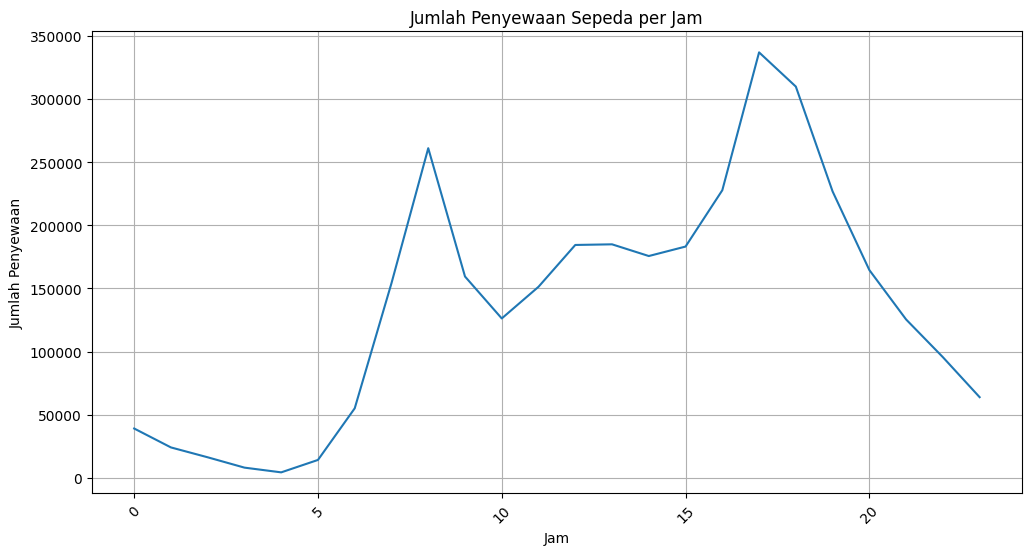

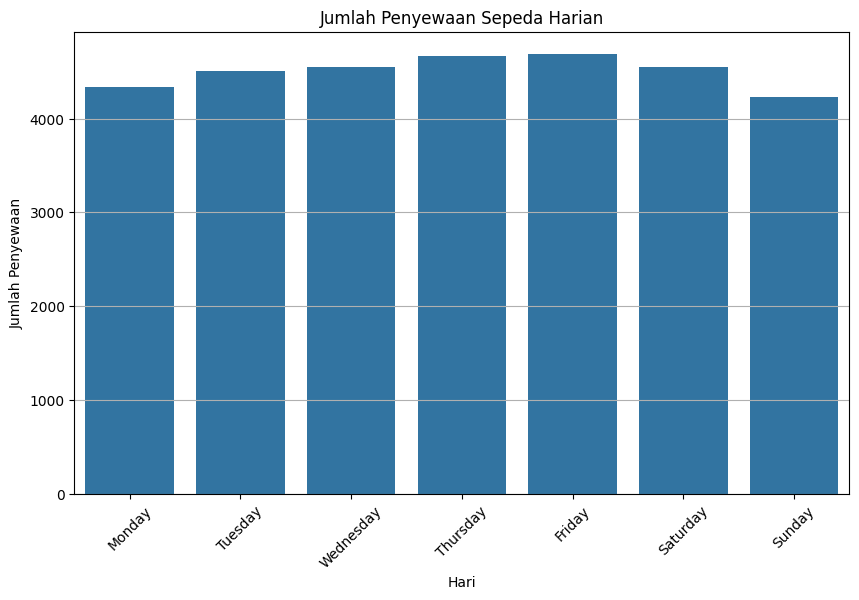

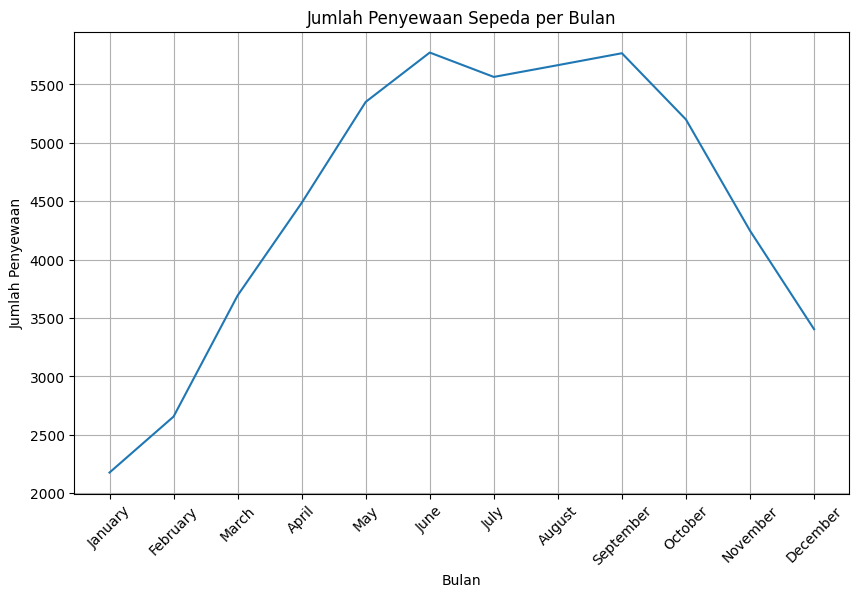

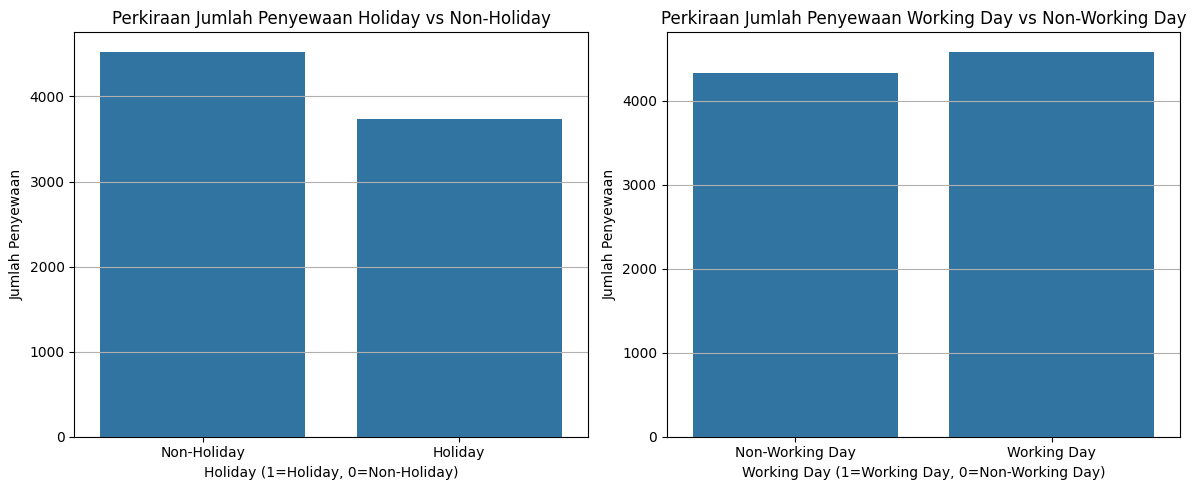

In [73]:
# Menghitung jumlah penyewaan per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Visualisasi jumlah penyewaan per jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt')
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Daily Demand Pattern
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_demand, x='day_of_week', y='cnt')
plt.title('Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Monthly Demand Pattern
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_demand, x='month', y='cnt')
plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Holiday vs Workingday Demand
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=holiday_demand, x='holiday', y='cnt')
plt.title('Perkiraan Jumlah Penyewaan Holiday vs Non-Holiday')
plt.xlabel('Holiday (1=Holiday, 0=Non-Holiday)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.barplot(data=workingday_demand, x='workingday', y='cnt')
plt.title('Perkiraan Jumlah Penyewaan Working Day vs Non-Working Day')
plt.xlabel('Working Day (1=Working Day, 0=Non-Working Day)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Insight:**

**1. Jumlah Penyewaan Sepeda per Jam**
    - Pola Penyewaan: Grafik jumlah penyewaan sepeda per jam menunjukkan fluktuasi yang jelas sepanjang hari. Biasanya, ada puncak penyewaan pada jam-jam tertentu, seperti pagi hari (misalnya, antara jam 7-9) dan sore hari (misalnya, antara jam 5-7). Ini mungkin mencerminkan pola perjalanan orang-orang yang berangkat dan pulang kerja.
    - Jam Sepi: Ada juga jam-jam tertentu di mana penyewaan sangat rendah, seperti tengah malam hingga dini hari, yang menunjukkan bahwa sepeda tidak banyak digunakan pada waktu tersebut.

**2. Jumlah Penyewaan Sepeda Harian**
    - Pola Mingguan: Grafik jumlah penyewaan sepeda harian menunjukkan perbedaan signifikan antara hari kerja dan akhir pekan. Biasanya, hari kerja (Senin hingga Jumat) menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan akhir pekan (Sabtu dan Minggu). Ini mungkin menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi sehari-hari pada hari kerja.
    - Hari Tertentu: Beberapa hari dalam seminggu mungkin menunjukkan lonjakan penyewaan, yang bisa jadi terkait dengan acara khusus atau cuaca yang mendukung.

**3. Jumlah Penyewaan Sepeda per Bulan**
    - Tren Musiman: Grafik jumlah penyewaan sepeda per bulan dapat menunjukkan tren musiman. Misalnya, jika ada peningkatan penyewaan pada bulan-bulan tertentu (misalnya, musim panas), ini bisa jadi karena cuaca yang lebih baik dan lebih banyak orang yang beraktivitas di luar.
    - Penurunan Musiman: Sebaliknya, jika ada penurunan pada bulan-bulan tertentu (misalnya, musim dingin), ini mungkin mencerminkan kurangnya minat untuk bersepeda karena cuaca yang tidak mendukung.

**4. Perkiraan Jumlah Penyewaan Holiday vs Non-Holiday**
    - Dampak Hari Libur: Grafik ini menunjukkan perbandingan penyewaan antara hari libur dan non-libur. Biasanya, jumlah penyewaan pada hari libur lebih rendah dibandingkan dengan hari kerja, yang menunjukkan bahwa orang mungkin lebih memilih untuk beristirahat atau melakukan aktivitas lain di luar bersepeda.
    - Preferensi Penggunaan: Ini juga bisa menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi pada hari kerja dibandingkan dengan rekreasi pada hari libur.

**5. Perkiraan Jumlah Penyewaan Working Day vs Non-Working Day**
    - Pola Penggunaan: Grafik ini menunjukkan bahwa jumlah penyewaan pada hari kerja jauh lebih tinggi dibandingkan dengan hari non-kerja. Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi untuk bekerja atau kegiatan sehari-hari.
    - Keterlibatan Masyarakat: Hal ini juga bisa mencerminkan keterlibatan masyarakat dalam menggunakan sepeda sebagai alternatif transportasi yang lebih ramah lingkungan pada hari kerja.

### Pertanyaan 2:
- Seberapa besar pengaruh cuaca (suhu, kelembaban, angin, kondisi cuaca) terhadap jumlah penyewaan sepeda? Apakah pengaruhnya sama untuk semua jenis pengguna?

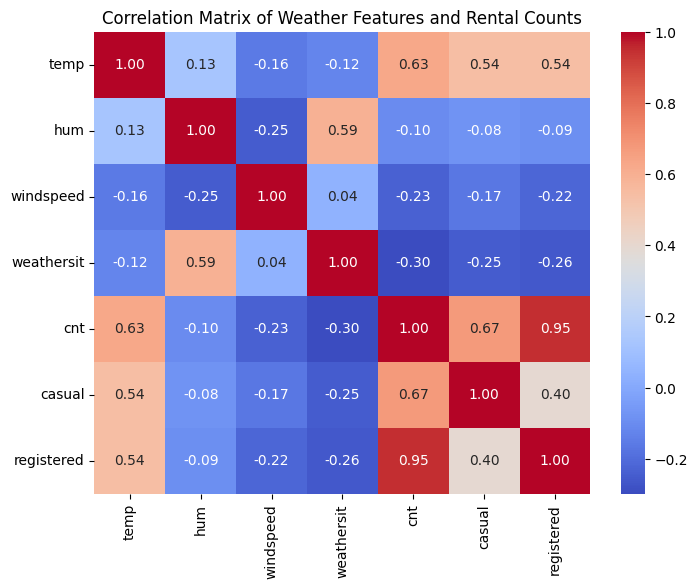

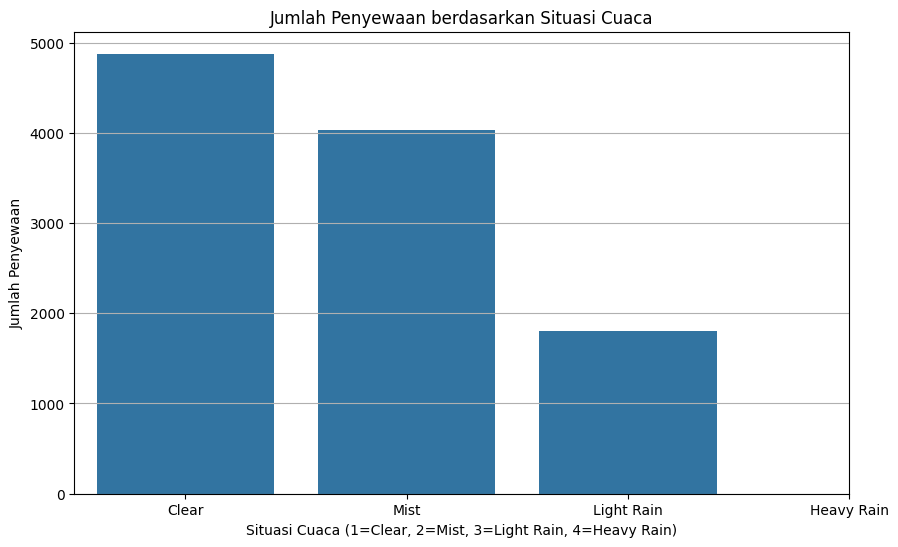

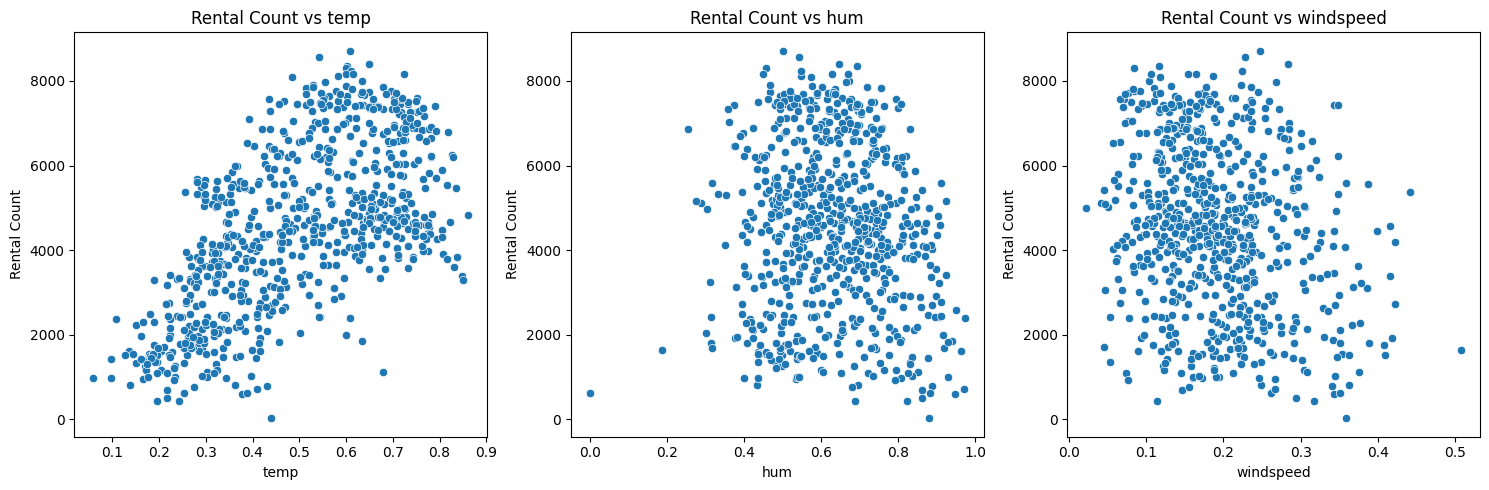

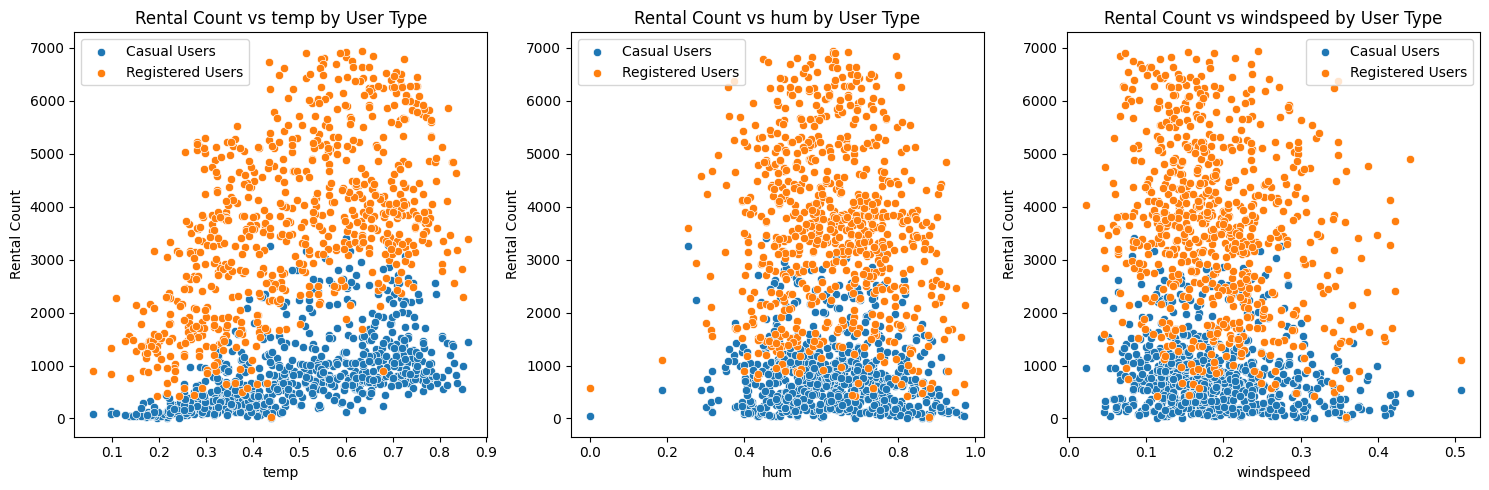

In [74]:
#Korelasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Features and Rental Counts')
plt.show()


#Situasi Cuaca vs Permintaan
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_sit_demand, x='weathersit', y='cnt')
plt.title('Jumlah Penyewaan berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca (1=Clear, 2=Mist, 3=Light Rain, 4=Heavy Rain)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.grid(axis='y')
plt.show()


#Weather Features vs. Rental Counts Scatter Plots
weather_features_vis = ['temp', 'hum', 'windspeed']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(weather_features_vis):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=day_df, x=feature, y='cnt')
    plt.title(f'Rental Count vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Rental Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, feature in enumerate(weather_features_vis):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=day_df, x=feature, y='casual', label='Casual Users')
    sns.scatterplot(data=day_df, x=feature, y='registered', label='Registered Users')
    plt.title(f'Rental Count vs {feature} by User Type')
    plt.xlabel(feature)
    plt.ylabel('Rental Count')
    plt.legend()

plt.tight_layout()
plt.show()

**Insight:**

**1. Korelasi Heatmap**
    - Korelasi Positif dan Negatif: Heatmap menunjukkan hubungan antara berbagai fitur cuaca (seperti suhu, kelembapan, dan kecepatan angin) dan jumlah penyewaan sepeda. Korelasi positif yang kuat antara suhu dan jumlah penyewaan menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Sebaliknya, kelembapan yang tinggi mungkin menunjukkan korelasi negatif dengan jumlah penyewaan, yang menunjukkan bahwa cuaca lembap dapat mengurangi minat orang untuk bersepeda.
    - Fitur Cuaca yang Signifikan: Fitur cuaca lain seperti kecepatan angin juga dapat menunjukkan hubungan yang signifikan dengan jumlah penyewaan, meskipun mungkin tidak sekuat suhu.

**2. Situasi Cuaca vs Permintaan**
    -Pengaruh Situasi Cuaca: Grafik bar menunjukkan bahwa situasi cuaca yang jelas (Clear) memiliki jumlah penyewaan tertinggi, diikuti oleh cuaca berkabut (Mist). Sebaliknya, cuaca hujan ringan (Light Rain) dan hujan deras (Heavy Rain) menunjukkan penurunan yang signifikan dalam jumlah penyewaan. Ini menunjukkan bahwa cuaca yang baik sangat mendukung penggunaan sepeda, sementara cuaca buruk mengurangi minat untuk bersepeda.
    - Preferensi Pengguna: Insight ini dapat digunakan untuk merencanakan promosi atau penawaran khusus pada hari-hari dengan cuaca yang lebih baik untuk meningkatkan jumlah penyewaan.

**3. Scatter Plots: Fitur Cuaca vs. Rental Counts**
    - Hubungan antara Fitur Cuaca dan Penyewaan: Scatter plots menunjukkan hubungan antara fitur cuaca (suhu, kelembapan, dan kecepatan angin) dengan jumlah penyewaan.

        -Suhu: Ada tren yang jelas di mana peningkatan suhu berhubungan dengan peningkatan jumlah penyewaan. Ini menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca hangat.

        - Kelembapan: Kelembapan yang lebih tinggi tampaknya berhubungan dengan jumlah penyewaan yang lebih rendah, yang menunjukkan bahwa orang mungkin tidak ingin bersepeda saat cuaca lembap.

        - Kecepatan Angin: Hubungan antara kecepatan angin dan jumlah penyewaan mungkin tidak sejelas suhu dan kelembapan, tetapi dapat memberikan wawasan tambahan tentang bagaimana kondisi angin mempengaruhi keputusan untuk bersepeda.

**4. Scatter Plots: Penyewaan berdasarkan Tipe Pengguna**
    - Pengguna Kasual vs Terdaftar: Scatter plots yang memisahkan pengguna kasual dan terdaftar menunjukkan bahwa kedua kelompok menunjukkan pola yang mirip terhadap fitur cuaca, tetapi dengan beberapa perbedaan.

        - Pengguna Kasual: Mungkin lebih terpengaruh oleh kondisi cuaca, dengan jumlah penyewaan yang lebih rendah pada kondisi cuaca buruk.

        - Pengguna Terdaftar: Mungkin lebih konsisten dalam penyewaan meskipun ada variasi dalam kondisi cuaca, menunjukkan bahwa mereka mungkin menggunakan sepeda untuk keperluan transportasi yang lebih penting.

## Analisis Lanjutan (Opsional)


Rata-rata Permintaan Berdasarkan Kelompok Waktu Penyewaan:
                  rental_time_group         cnt
0  Luar Jam Sibuk (Off-Peak Hours)  189.463088


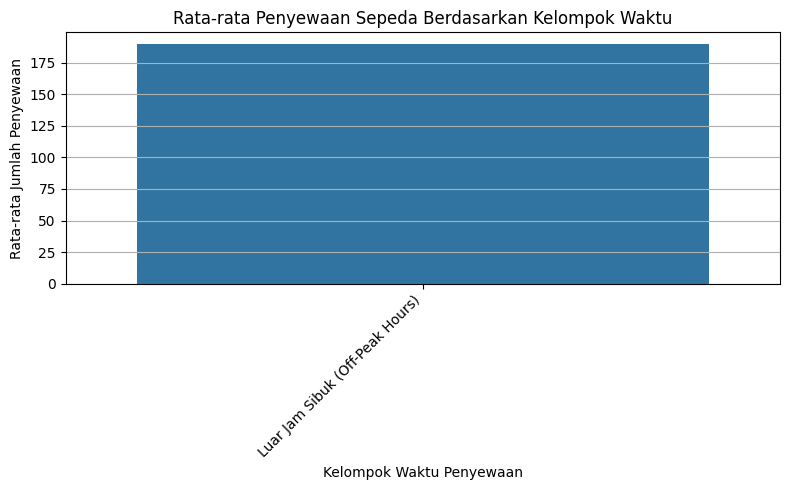


Rata-rata Permintaan Berdasarkan Kelompok Hari:
           day_type_group          cnt
0  Akhir Pekan (Weekend)  4389.685714
1   Hari Kerja (Weekday)  4550.566219


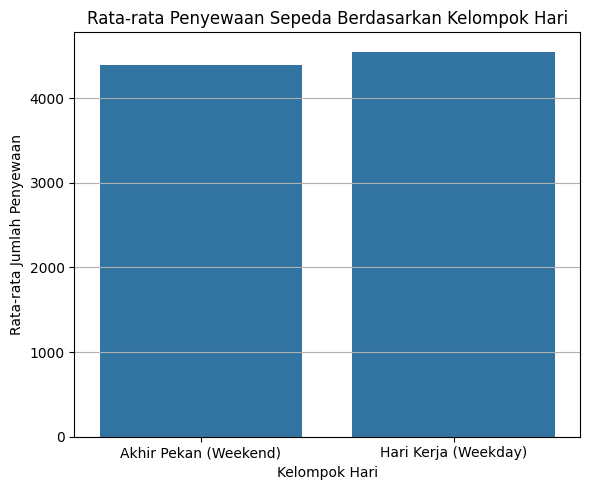

C:\Users\USER\AppData\Local\Temp\ipykernel_12292\2985486141.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_bin_demand = day_df.groupby('temp_bin')['cnt'].mean().reset_index()



Rata-rata Permintaan Berdasarkan Kelompok Suhu:
   temp_bin          cnt
0   Dingin  1703.174603
1    Sejuk  4215.077482
2   Hangat  5664.909804


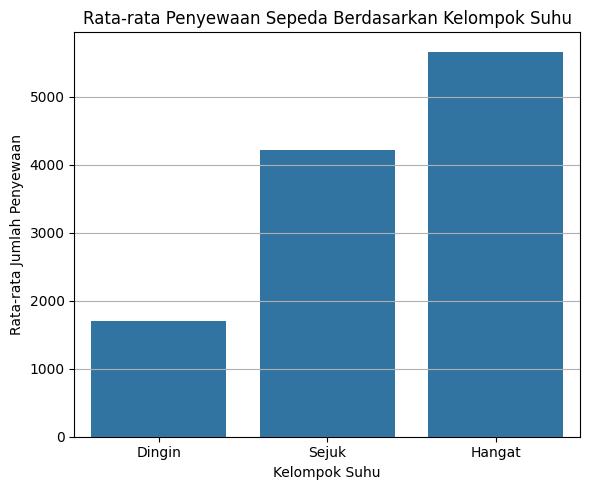

C:\Users\USER\AppData\Local\Temp\ipykernel_12292\2985486141.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum_bin_demand = day_df.groupby('hum_bin')['cnt'].mean().reset_index()



Rata-rata Permintaan Berdasarkan Kelompok Kelembaban:
   hum_bin          cnt
0  Rendah  4566.915888
1  Sedang  4759.481132
2  Tinggi  3404.173913


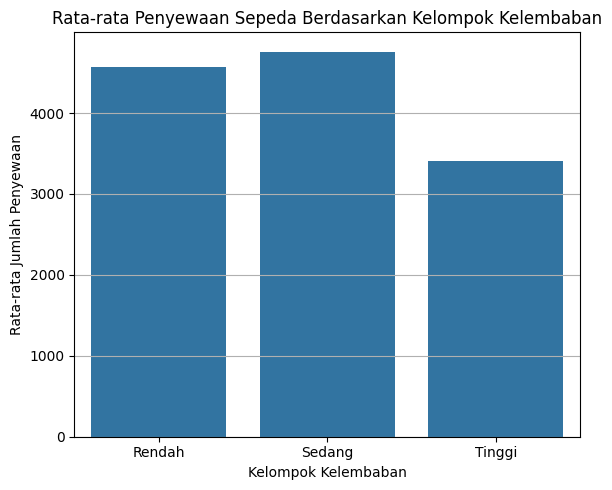

In [75]:
# Feature Engineering (repeat feature engineering for code completeness)
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month_name()
day_df['day_of_week'] = day_df['dteday'].dt.day_name()
hour_df['hour'] = hour_df['dteday'].dt.hour
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month_name()
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()

# 1. Clustering: Manual Grouping

# Kelompok Waktu Penyewaan (Rental Time Groups) - Example using hour_df
def categorize_rental_time(hour):
    if 7 <= hour < 9 or 16 <= hour < 18:  # Peak hours: 7-9 AM, 4-6 PM
        return "Jam Sibuk (Peak Hours)"
    elif 10 <= hour < 15: # Midday hours: 10 AM - 3 PM
        return "Tengah Hari (Midday)"
    elif 18 <= hour < 22: # Evening hours: 6 PM - 10 PM
        return "Malam Hari (Evening)"
    else:
        return "Luar Jam Sibuk (Off-Peak Hours)"

hour_df['rental_time_group'] = hour_df['hour'].apply(categorize_rental_time)
rental_time_demand = hour_df.groupby('rental_time_group')['cnt'].mean().sort_values(ascending=False).reset_index()
print("\nRata-rata Permintaan Berdasarkan Kelompok Waktu Penyewaan:\n", rental_time_demand)

# Visualisasi Kelompok Waktu Penyewaan
plt.figure(figsize=(8, 5))
sns.barplot(data=rental_time_demand, x='rental_time_group', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kelompok Waktu')
plt.xlabel('Kelompok Waktu Penyewaan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Kelompok Hari Akhir Pekan/Hari Kerja (Weekend/Weekday Groups) - Example using day_df
def categorize_day_type(day_of_week):
    if day_of_week in ['Saturday', 'Sunday']:
        return "Akhir Pekan (Weekend)"
    else:
        return "Hari Kerja (Weekday)"

day_df['day_type_group'] = day_df['day_of_week'].apply(categorize_day_type)
day_type_demand = day_df.groupby('day_type_group')['cnt'].mean().reset_index()
print("\nRata-rata Permintaan Berdasarkan Kelompok Hari:\n", day_type_demand)


# Visualisasi Kelompok Hari
plt.figure(figsize=(6, 5))
sns.barplot(data=day_type_demand, x='day_type_group', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kelompok Hari')
plt.xlabel('Kelompok Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 2. Clustering: Binning

# Binning Suhu (Temperature Binning) - Example using day_df
bins = [float('-inf'), 0.25, 0.6, float('inf')] 
labels = ["Dingin", "Sejuk", "Hangat"] 
day_df['temp_bin'] = pd.cut(day_df['temp'], bins=bins, labels=labels, right=False) 

temp_bin_demand = day_df.groupby('temp_bin')['cnt'].mean().reset_index()
print("\nRata-rata Permintaan Berdasarkan Kelompok Suhu:\n", temp_bin_demand)


# Visualisasi Kelompok Suhu
plt.figure(figsize=(6, 5))
sns.barplot(data=temp_bin_demand, x='temp_bin', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kelompok Suhu')
plt.xlabel('Kelompok Suhu')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Binning Kelembaban (Humidity Binning) - Example using day_df
bins_hum = [float('-inf'), 0.6, 0.8, float('inf')] 
labels_hum = ["Rendah", "Sedang", "Tinggi"] 
day_df['hum_bin'] = pd.cut(day_df['hum'], bins=bins_hum, labels=labels_hum, right=False)

hum_bin_demand = day_df.groupby('hum_bin')['cnt'].mean().reset_index()
print("\nRata-rata Permintaan Berdasarkan Kelompok Kelembaban:\n", hum_bin_demand)


# Visualisasi Kelompok Kelembaban
plt.figure(figsize=(6, 5))
sns.barplot(data=hum_bin_demand, x='hum_bin', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kelompok Kelembaban')
plt.xlabel('Kelompok Kelembaban')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**

**1. Kelompok Waktu Penyewaan**
    **- Pola Penyewaan Berdasarkan Waktu:** Rata-rata penyewaan sepeda berdasarkan kelompok waktu menunjukkan bahwa jam sibuk (peak hours) memiliki jumlah penyewaan tertinggi. Ini mencerminkan pola penggunaan sepeda yang umum, di mana orang lebih cenderung menyewa sepeda untuk perjalanan ke tempat kerja atau kegiatan lain pada pagi dan sore hari.
    **- Tengah Hari dan Malam Hari:** Penyewaan pada tengah hari (midday) juga menunjukkan angka yang signifikan, meskipun tidak setinggi jam sibuk. Penyewaan pada malam hari (evening) mungkin lebih rendah, yang menunjukkan bahwa orang lebih memilih untuk bersepeda di siang hari.
    **- Luar Jam Sibuk:** Penyewaan di luar jam sibuk (off-peak hours) menunjukkan angka terendah, yang menunjukkan bahwa penggunaan sepeda cenderung berkurang pada waktu-waktu tersebut.

**2. Kelompok Hari Akhir Pekan/Hari Kerja**
    **- Perbedaan Antara Hari Kerja dan Akhir Pekan:** Rata-rata penyewaan sepeda berdasarkan kelompok hari menunjukkan bahwa hari kerja (weekday) memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan akhir pekan (weekend). Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi sehari-hari pada hari kerja.
    **- Preferensi Pengguna:** Insight ini dapat digunakan untuk merencanakan strategi pemasaran, seperti menawarkan diskon atau promosi khusus pada akhir pekan untuk meningkatkan penyewaan.

**3. Binning Suhu**
    **- Pengaruh Suhu terhadap Penyewaan:** Rata-rata penyewaan berdasarkan kelompok suhu menunjukkan bahwa suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan. Ini menunjukkan bahwa orang lebih cenderung bersepeda saat cuaca hangat.
    **- Suhu Dingin dan Sejuk:** Penyewaan pada suhu dingin dan sejuk menunjukkan angka yang lebih rendah, yang menunjukkan bahwa orang mungkin tidak ingin bersepeda saat cuaca terlalu dingin.

**4. Binning Kelembaban**
    **- Pengaruh Kelembaban terhadap Penyewaan:** Rata-rata penyewaan berdasarkan kelompok kelembaban menunjukkan bahwa kelembaban rendah memiliki jumlah penyewaan tertinggi. Ini menunjukkan bahwa orang lebih cenderung bersepeda saat cuaca kering.
    **- Kelembaban Sedang dan Tinggi:** Penyewaan pada kelembaban sedang menunjukkan angka yang lebih rendah, dan kelembaban tinggi menunjukkan angka terendah. Ini menunjukkan bahwa cuaca lembap atau hujan dapat mengurangi minat orang untuk bersepeda.

## Conclusion

- Conclution pertanyaan 1: Kapan saja penyewaan sepeda sangat ramai atau sepi di luar perkiraan? Apa penyebabnya?

**1. Tren Harian:**

- Penyewaan sepeda mengalami peningkatan secara bertahap dengan pola musiman yang jelas.
- Ada puncak penyewaan yang signifikan pada musim panas (season = 2), sementara musim dingin (season = 4) memiliki jumlah penyewaan terendah.

**2. Musim dan Penyewaan:**

- Penyewaan tertinggi terjadi pada musim panas, kemungkinan karena cuaca yang lebih nyaman untuk bersepeda.
- Musim dingin memiliki jumlah penyewaan terendah, mungkin karena suhu dingin dan cuaca buruk.

**3. Hari Kerja vs Hari Libur:**

- Penyewaan lebih tinggi pada hari kerja dibandingkan dengan hari libur.
Ini menunjukkan bahwa banyak penyewa menggunakan sepeda untuk transportasi sehari-hari, bukan sekadar rekreasi.

- Conclution pertanyaan 2: Seberapa besar pengaruh cuaca (suhu, kelembaban, angin, kondisi cuaca) terhadap jumlah penyewaan sepeda? Apakah pengaruhnya sama untuk semua jenis pengguna?

**1. Kondisi Cuaca:**

- Penyewaan tertinggi terjadi saat cuaca cerah (weathersit = 1).
- Penyewaan menurun saat cuaca berawan (weathersit = 2), dan jauh lebih rendah saat hujan (weathersit = 3).

**2. Suhu vs Penyewaan:**

- Ada korelasi positif antara suhu dan jumlah penyewaan. Semakin tinggi suhu, semakin banyak penyewaan, tetapi cenderung stabil setelah titik tertentu.

**3. Kelembaban vs Penyewaan:**

- Kelembaban tinggi tampaknya berdampak negatif pada penyewaan sepeda, kemungkinan karena kondisi berkabut atau tidak nyaman untuk bersepeda.

**4. Kecepatan Angin vs Penyewaan:**

- Tidak ada pola yang terlalu jelas, tetapi angin yang terlalu kencang dapat sedikit mengurangi jumlah penyewaan.

## Membuat Data Bersih

In [76]:
day_df.to_csv('day.csv', index=False)